<a href="https://colab.research.google.com/github/tommyA8/Animal-10-CLassification-VGG16_Transfer_learning/blob/main/Fire_Detection_YOLOv5_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [1]:
# @title Cloning YOLOv5 Repo.
!git clone -q https://github.com/ultralytics/yolov5

%cd yolov5
!pip -q install -r requirements.txt

%cd ..

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 50.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.4.0 which is incompatible.
/content


In [2]:
# @title Dowload open-source fire datasets

# @markdown # Source

# @markdown https://github.com/gaiasd/DFireDataset

# @markdown # Citation:

# @markdown Pedro Vinícius Almeida Borges de Venâncio, Adriano Chaves Lisboa, Adriano Vilela Barbosa: [An automatic fire detection system based on deep convolutional neural networks for low-power, resource-constrained devices.](https://link.springer.com/article/10.1007/s00521-022-07467-z) In: Neural Computing and Applications, 2022.

import gdown

# URL of the Google Drive file (replace FILE_ID with your actual file ID)
FILE_ID = '19LSrZHYQqJSdKgH8Mtlgg7-i-L3eRhbh'
url = 'https://drive.google.com/uc?id={}&authuser=0'.format(FILE_ID)

# Path to save the file (replace with your desired file path
output = 'D-Fire.zip'

# Download the file
gdown.download(url, output, quiet=False)

# unzip
!unzip -q D-Fire.zip -d D-File-Datasets

Downloading...
From (original): https://drive.google.com/uc?id=19LSrZHYQqJSdKgH8Mtlgg7-i-L3eRhbh&authuser=0
From (redirected): https://drive.google.com/uc?id=19LSrZHYQqJSdKgH8Mtlgg7-i-L3eRhbh&authuser=0&confirm=t&uuid=64190627-97c2-4ea4-a538-60055e9ef3bd
To: /content/D-Fire.zip
100%|██████████| 3.04G/3.04G [00:36<00:00, 83.9MB/s]


In [3]:
# @title Download our fire datasets

# https://drive.google.com/file/d/1gkaaytI2J1kN0CTNJCmIa8nAGJ-1bwbr/view?usp=sharing
FILE_ID = '1gkaaytI2J1kN0CTNJCmIa8nAGJ-1bwbr'
url = "https://drive.google.com/uc?id={}&authuser=0".format(FILE_ID)
output = 'mrt_fire_datasets.zip'

# Download the file
gdown.download(url, output, quiet=False)

# unzip
!unzip -q mrt_fire_datasets.zip -d MRT-Datasets

Downloading...
From (original): https://drive.google.com/uc?id=1gkaaytI2J1kN0CTNJCmIa8nAGJ-1bwbr&authuser=0
From (redirected): https://drive.google.com/uc?id=1gkaaytI2J1kN0CTNJCmIa8nAGJ-1bwbr&authuser=0&confirm=t&uuid=f1fe3076-e6d4-4e4f-a055-927aefdd4e0e
To: /content/mrt_fire_datasets.zip
100%|██████████| 127M/127M [00:03<00:00, 36.6MB/s]


In [4]:
# @title Merging both of datasets

from genericpath import exists
# Merging both of datasets
import os
import glob
import shutil

!rm -rf /content/Datasets

# makedirs
new_folder = "/content/Datasets"
os.makedirs(f"{new_folder}/train/images", exist_ok=True)
os.makedirs(f"{new_folder}/train/labels", exist_ok=True)
os.makedirs(f"{new_folder}/val/images", exist_ok=True)
os.makedirs(f"{new_folder}/val/labels", exist_ok=True)

# rename
try:
  os.rename("/content/D-File-Datasets/test", "/content/D-File-Datasets/val")
except:
  pass

# copy
shutil.copytree("/content/MRT-Datasets/mrt_fire_datasets/train/images", f"{new_folder}/train/images", dirs_exist_ok=True)
shutil.copytree("/content/MRT-Datasets/mrt_fire_datasets/train/labels", f"{new_folder}/train/labels", dirs_exist_ok=True)
shutil.copytree("/content/MRT-Datasets/mrt_fire_datasets/val/images", f"{new_folder}/val/images", dirs_exist_ok=True)
shutil.copytree("/content/MRT-Datasets/mrt_fire_datasets/val/labels", f"{new_folder}/val/labels", dirs_exist_ok=True)
shutil.copytree("/content/D-File-Datasets/train/images", f"{new_folder}/train/images", dirs_exist_ok=True)
shutil.copytree("/content/D-File-Datasets/train/labels", f"{new_folder}/train/labels", dirs_exist_ok=True)
shutil.copytree("/content/D-File-Datasets/val/images", f"{new_folder}/val/images", dirs_exist_ok=True)
shutil.copytree("/content/D-File-Datasets/val/labels", f"{new_folder}/val/labels", dirs_exist_ok=True)

'/content/Datasets/val/labels'

In [5]:
print("Number of D-File-Datasets")
print(len(glob.glob(f"/content/D-File-Datasets/train/images/*")))
print(len(glob.glob(f"/content/D-File-Datasets/val/images/*")))

Number of D-File-Datasets
17221
4306


In [6]:
print("Number of MRT-Fire-Datasets")
print(len(glob.glob(f"/content/MRT-Datasets/mrt_fire_datasets/train/images/*")))
print(len(glob.glob(f"/content/MRT-Datasets/mrt_fire_datasets/val/images/*")))

Number of MRT-Fire-Datasets
194
22


In [7]:
print("Number of merged dataset")
print(len(glob.glob(f"/content/Datasets/train/images/*")))
print(len(glob.glob(f"/content/Datasets/val/images/*")))

Number of merged dataset
17415
4328


In [8]:
# @title Create data.yaml
%cd /content/Datasets

import yaml

data = {
    'train': '/content/Datasets/train/images',
    'val': '/content/Datasets/val/images',
    'nc': 2,
    'names': ['Smoke', 'Fire']
}

with open('data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

/content/Datasets


In [9]:
%cd ..

/content


In [10]:
# @title Min, Mean and Max sizing
import cv2

h_stored, w_stored = [], []
for image in glob.glob(f"/content/MRT-Datasets/mrt_fire_datasets/train/images/*"):
  image = cv2.imread(image)
  h, w, _ = image.shape
  h_stored.append(h)
  w_stored.append(w)

print(f"Min height: {min(h_stored)}")
print(f"Min width: {min(w_stored)}")
print(f"Mean height: {sum(h_stored)/len(h_stored)}")
print(f"Mean width: {sum(w_stored)/len(w_stored)}")
print(f"Max height: {max(h_stored)}")
print(f"Max width: {max(w_stored)}")

Min height: 640
Min width: 640
Mean height: 640.0
Mean width: 640.0
Max height: 640
Max width: 640


In [11]:
h_stored, w_stored = [], []
for image in glob.glob(f"/content/D-File-Datasets/train/images/*"):
  image = cv2.imread(image)
  h, w, _ = image.shape
  h_stored.append(h)
  w_stored.append(w)

print(f"Min height: {min(h_stored)}")
print(f"Min width: {min(w_stored)}")
print(f"Mean height: {sum(h_stored)/len(h_stored)}")
print(f"Mean width: {sum(w_stored)/len(w_stored)}")
print(f"Max height: {max(h_stored)}")
print(f"Max width: {max(w_stored)}")

Min height: 150
Min width: 162
Mean height: 582.8662679286917
Mean width: 985.2831426746415
Max height: 2848
Max width: 4288


# Pre-processing
Including Augmentation, Resize

In [12]:
import numpy as np
import random
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import albumentations as A
from albumentations.pytorch import ToTensorV2
import os
import glob
from tqdm import tqdm

In [31]:
BOX_COLOR = [(0, 255, 0), (255, 0, 0),] # ==> Green, Red
TEXT_COLOR = (255, 255, 255) # White

def visualize_bbox(img, bbox, class_name, color, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, y_min, w, h = int(x_min), int(y_min), int(w), int(h)

    cv2.rectangle(img, (x_min, y_min), (w, h), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=(255, 255, 255), # White,
        lineType=cv2.LINE_AA,
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, color=BOX_COLOR[category_id])
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

# Function to read YOLO annotations
def read_yolo_annotations(annotation_path):
    with open(annotation_path, 'r') as file:
        bboxes = []
        labels = []
        for line in file:
          """ แก้ class overwrite file เดิม """
          data = line.split()
          labels.append(int(data[0]))
          bbox = [float(x) for x in data[1:]]
          bboxes.append(bbox)
    return bboxes, labels

# Function to save augmented YOLO annotations
def save_yolo_annotations(annotation_path, bboxes, labels):
    with open(annotation_path, 'w') as file:
        for bbox, label in zip(bboxes, labels):
            file.write(f"{label} {' '.join(map(str, bbox))}\n")

def de_norm_bounding_box(norm_bbox, img_width, img_height):
    x_center_norm, y_center_norm, w_norm, h_norm = norm_bbox

    # Restore to original pixel values
    x_center = x_center_norm * img_width
    y_center = y_center_norm * img_height
    w = w_norm * img_width
    h = h_norm * img_height

    # Calculate top-left and bottom-right corners
    x_min = x_center - w / 2
    y_min = y_center - h / 2
    x_max = x_center + w / 2
    y_max = y_center + h / 2
    return x_min, y_min, x_max, y_max

def resize_image(image_path, target_size=(640, 640)):
  """
  resize image to target size and return image array
  image_path: path to the image file
  """
  # Read image
  image = cv2.imread(image_path)
  if image is None:
      return f"Error: Unable to read image {filename}."
  # Resize image
  image_resized = cv2.resize(image, target_size, cv2.INTER_AREA)
  # Convert the image to a PIL Image and save in RGB format
  image_pil = Image.fromarray(image_resized)
  try:
    image_pil.save(image_path, format='PNG')
  except Exception as e:
    return f"Error saving image {filename}: {e}"
  return image

def augmentator(train_image_dir, annotation_dir, label_list):
    didnt_aug_count = 0

    # Correct glob patterns for both jpg and png files
    image_paths = glob.glob(os.path.join(train_image_dir, '*.jpg')) + glob.glob(os.path.join(train_image_dir, '*.png'))
    frame_log = tqdm(total=0, position=4, bar_format='{desc}')

    for image_path in tqdm(image_paths, desc="Augmenting: "):
        filename = os.path.basename(image_path)
        annotation_path = os.path.join(annotation_dir, os.path.splitext(filename)[0] + '.txt')

        # Check if annotation file exists in the label list
        if os.path.splitext(filename)[0] + '.txt' not in label_list:
            frame_log.set_description_str(f"{filename} doesn't exist.")
            os.remove(image_path)
            # if os.path.exists(annotation_path):
            os.remove(annotation_path)
            continue

        # Read image and annotations
        image = cv2.imread(image_path)
        if image is None:
            frame_log.set_description_str(f"Error: Unable to read image {filename}.")
            continue

        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Read annotations (Implement the read_yolo_annotations function)
        try:
            bboxes, labels = read_yolo_annotations(annotation_path)
        except Exception as e:
            frame_log.set_description_str(f"Error reading annotations for {filename}: {e}")
            didnt_aug_count += 1
            continue

        # Apply augmentation (Implement the transform function)
        try:
            transformed = transform(image=image_rgb, bboxes=bboxes, labels=labels)
        except Exception as e:
            frame_log.set_description_str(f"Error augmenting {filename}: {e}")
            didnt_aug_count += 1
            continue

        # Save augmented image with a new name
        augmented_filename = os.path.splitext(filename)[0] + '_aug.png'
        augmented_image_path = os.path.join(train_image_dir, augmented_filename)
        augmented_image_rgb = transformed['image']

        try:
            # cv2.imwrite(augmented_image_path, cv2.cvtColor(augmented_image_rgb, cv2.COLOR_RGB2BGR))
            image_pil = Image.fromarray(augmented_image_rgb.permute(1, 2, 0).numpy())
            image_pil.save(augmented_image_path, format='PNG')
        except Exception as e:
            frame_log.set_description_str(f"Error saving augmented image {augmented_filename}: {e}")
            didnt_aug_count += 1
            continue

        # Save augmented annotations with a new name (Implement the save_yolo_annotations function)
        augmented_annotation_path = os.path.join(annotation_dir, os.path.splitext(filename)[0] + '_aug.txt')
        try:
            save_yolo_annotations(augmented_annotation_path, transformed['bboxes'], transformed['labels'])
        except Exception as e:
            frame_log.set_description_str(f"Error saving augmented annotations for {augmented_filename}: {e}")
            didnt_aug_count += 1
            continue

    return didnt_aug_count

## Augmentation Example

In [14]:
path = glob.glob('/content/MRT-Datasets/mrt_fire_datasets/train/images/*')[random.randint(0,200)]
filename = os.path.basename(path)
filename

'D4_S20240705170345_E20240705181026_00076000_resized.png'

In [15]:
path = glob.glob('/content/MRT-Datasets/mrt_fire_datasets/train/images/*')[random.randint(0,100)]

image = cv2.imread(f'/content/MRT-Datasets/mrt_fire_datasets/train/images/{filename}')
label_txt = f'/content/MRT-Datasets/mrt_fire_datasets/train/labels/{os.path.splitext(filename)[0]}.txt'

In [16]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Read bounding boxes and labels
bboxes, labels = read_yolo_annotations(label_txt)
bboxes, labels

([[0.592593, 0.510417, 0.045139, 0.178241]], [0])

In [17]:
# De-normalize
x1, y1, x2, y2 = de_norm_bounding_box(bboxes[0], 640, 640)
x1, y1, x2, y2

(364.81504, 269.62976, 393.704, 383.704)

In [18]:
# We will use the mapping from category_id to the class name
# to visualize the class label for the bounding box on the image
labels_id_to_name = {0: 'Smoke', 1: 'Fire'}

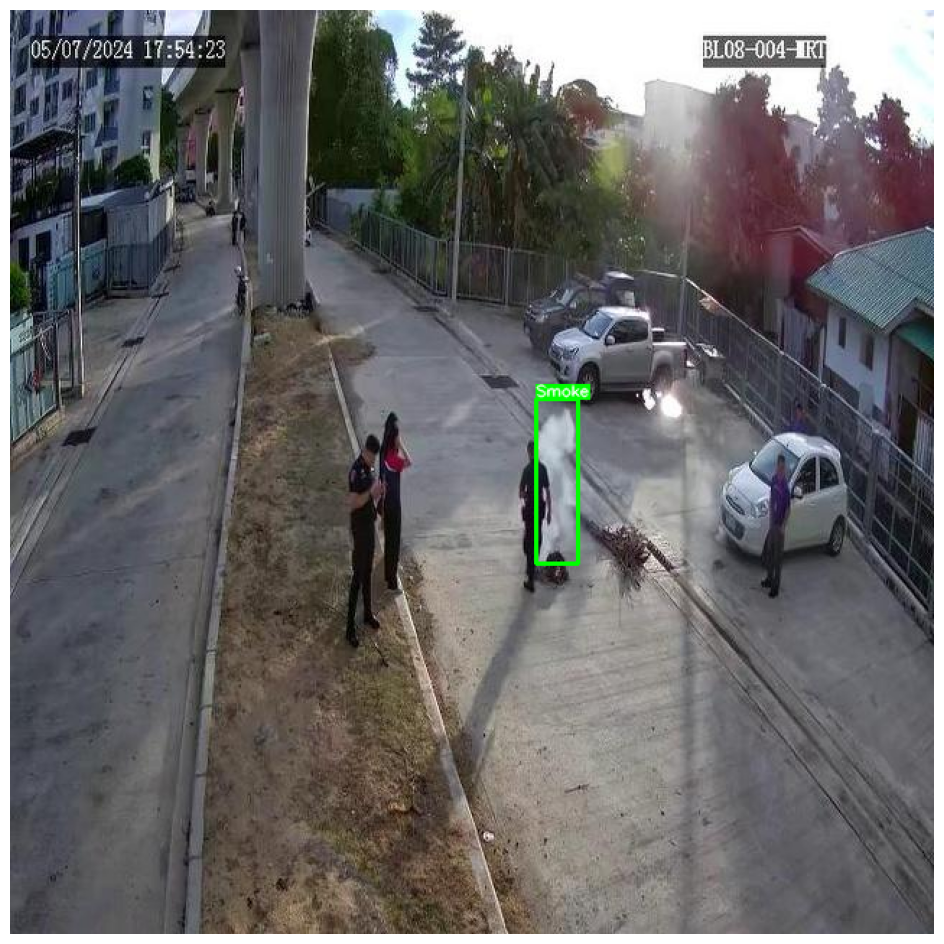

In [19]:
img = visualize(image, [[x1, y1, x2, y2]], labels, labels_id_to_name)

In [20]:
# @title Define the augmentation pipeline
transform= A.Compose([
    A.GaussNoise(p=0.8),
    A.GaussianBlur(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomScale(scale_limit=0.2, p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Resize(height=640, width=640, p=1, interpolation=cv2.INTER_AREA),
    ToTensorV2()
], bbox_params=A.BboxParams(format='yolo', min_area=0, min_visibility=0, label_fields=['labels']))

In [21]:
transformed = transform(image=image, bboxes=bboxes, labels=labels)

In [22]:
# check augmented image sizin
h, w, _ = transformed['image'].permute(1, 2, 0).numpy().shape
print(h, w)
# de-normalize bbox
x1, y1, x2, y2 = de_norm_bounding_box(list(transformed['bboxes'][0]), w, h)
print(x1, y1, x2, y2)

640 640
364.81504 256.296 393.704 370.37024


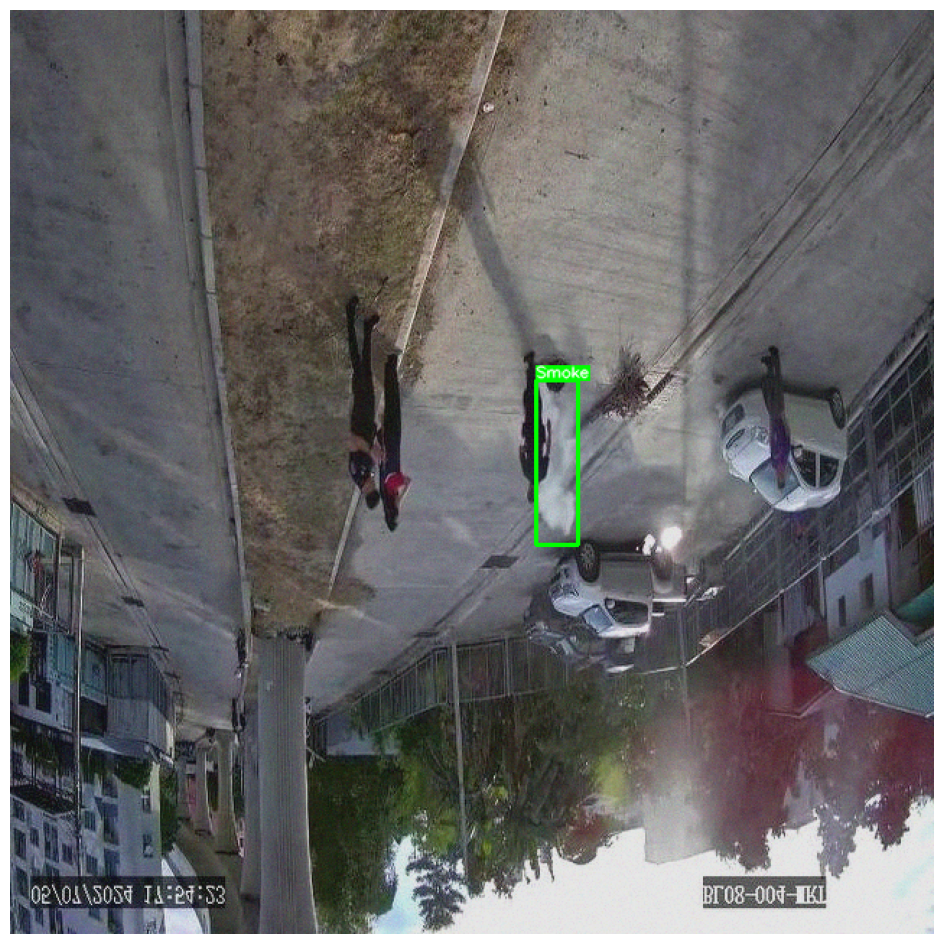

In [23]:
img = visualize(transformed['image'].permute(1, 2, 0).numpy(), [[x1, y1, x2, y2]], labels, labels_id_to_name)

## pre-processing fuction

In [24]:
train_dataset = '/content/Datasets/train/'
image_list, label_list = os.listdir(train_dataset + 'images'), os.listdir(train_dataset + 'labels')

annotation_dir = '/content/Datasets/train/labels'
train_image_dir= '/content/Datasets/train/images'

# before resize
print("Number of data before perform augmentation")
print("Number of train images",len(glob.glob(train_image_dir + '/*')))
print("Number of train labels",len(glob.glob(annotation_dir + '/*')))

Number of data before perform augmentation
Number of train images 17415
Number of train labels 17415


In [25]:
# resize image and overwrite them
for image in tqdm(glob.glob(f"{train_dataset}images/*"), 'Resizing: '):
  image = resize_image(image, target_size=(640, 640))
  if isinstance(image, str):
    print(image)

Resizing: 100%|██████████| 17415/17415 [52:24<00:00,  5.54it/s]


In [26]:
# after resize
print("Number of data before perform augmentation")
print("Number of train images",len(glob.glob(train_image_dir + '/*')))
print("Number of train labels",len(glob.glob(annotation_dir + '/*')))

Number of data before perform augmentation
Number of train images 17415
Number of train labels 17415


In [27]:
h_stored, w_stored = [], []
for image in glob.glob(f"{train_image_dir}/*"):
  image = cv2.imread(image)
  h, w, _ = image.shape
  h_stored.append(h)
  w_stored.append(w)

print(f"Min height: {min(h_stored)}")
print(f"Min width: {min(w_stored)}")
print(f"Mean height: {sum(h_stored)/len(h_stored)}")
print(f"Mean width: {sum(w_stored)/len(w_stored)}")
print(f"Max height: {max(h_stored)}")
print(f"Max width: {max(w_stored)}")

Min height: 640
Min width: 640
Mean height: 640.0
Mean width: 640.0
Max height: 640
Max width: 640


In [32]:
# augmentation

# resize แล้วไม่ได้เปลี่ยน bbox
didnt_aug_count = augmentator(train_image_dir, annotation_dir, label_list)
print("\nNumber of image that doesn't get augmented:", didnt_aug_count)

# after augmentation
print("Number of data after perform augmentation")
print("Number of train images",len(glob.glob(train_image_dir + '/*')))
print("Number of train labels",len(glob.glob(annotation_dir + '/*')))





Augmenting:   1%|          | 105/17415 [00:29<1:23:33,  3.45it/s]



Augmenting:   1%|          | 119/17415 [00:34<1:42:41,  2.81it/s]



Augmenting:   1%|          | 161/17415 [00:46<1:14:17,  3.87it/s]



Augmenting:   1%|▏         | 242/17415 [01:10<1:18:11,  3.66it/s]



Augmenting:   2%|▏         | 295/17415 [01:25<1:13:37,  3.88it/s]



Error augmenting WEB05107.jpg: Expected x_max for bbox (0.9046875000000001, 0.30833333333333335, 1.003125, 0.5166666666666667, 1) to be in the range [0.0, 1.0], got 1.003125.



Augmenting:   2%|▏         | 356/17415 [01:43<1:48:29,  2.62it/s]



Augmenting:   3%|▎         | 463/17415 [02:14<1:01:09,  4.62it/s]



Augmenting:   3%|▎         | 489/17415 [02:22<1:55:36,  2.44it/s]



Augmenting:   3%|▎         | 499/17415 [02:25<58:55,  4.79it/s]  



Augmenting:   3%|▎         | 504/17415 [02:26<1:04:22,  4.38it/s]



Augmenting:   3%|▎         | 527/17415 [02:32<1:21:22,  3.46it/s]


KeyboardInterrupt: 

In [ ]:
h_stored, w_stored = [], []
for image in glob.glob(f"{train_image_dir}/*"):
  image = cv2.imread(image)
  h, w, _ = image.shape
  h_stored.append(h)
  w_stored.append(w)

print(f"Min height: {min(h_stored)}")
print(f"Min width: {min(w_stored)}")
print(f"Mean height: {sum(h_stored)/len(h_stored)}")
print(f"Mean width: {sum(w_stored)/len(w_stored)}")
print(f"Max height: {max(h_stored)}")
print(f"Max width: {max(w_stored)}")

Min height: 640
Min width: 640
Mean height: 640.0
Mean width: 640.0
Max height: 640
Max width: 640


/content/Datasets/train/images/WEB05499_aug.jpg
/content/Datasets/train/labels/WEB05499_aug.txt
['1', '1', '1', '0']
640 640
[[402.6017912573419, 184.48180513861968, 475.90729537226264, 284.23731549630065], [309.0760757057798, 264.5935300222763, 338.5501540414208, 300.0106550005448], [239.53805417348, 310.57131682736883, 274.3885079483595, 349.6028049634465], [138.28184073246177, 0.0, 640.0, 349.9469928473461]]


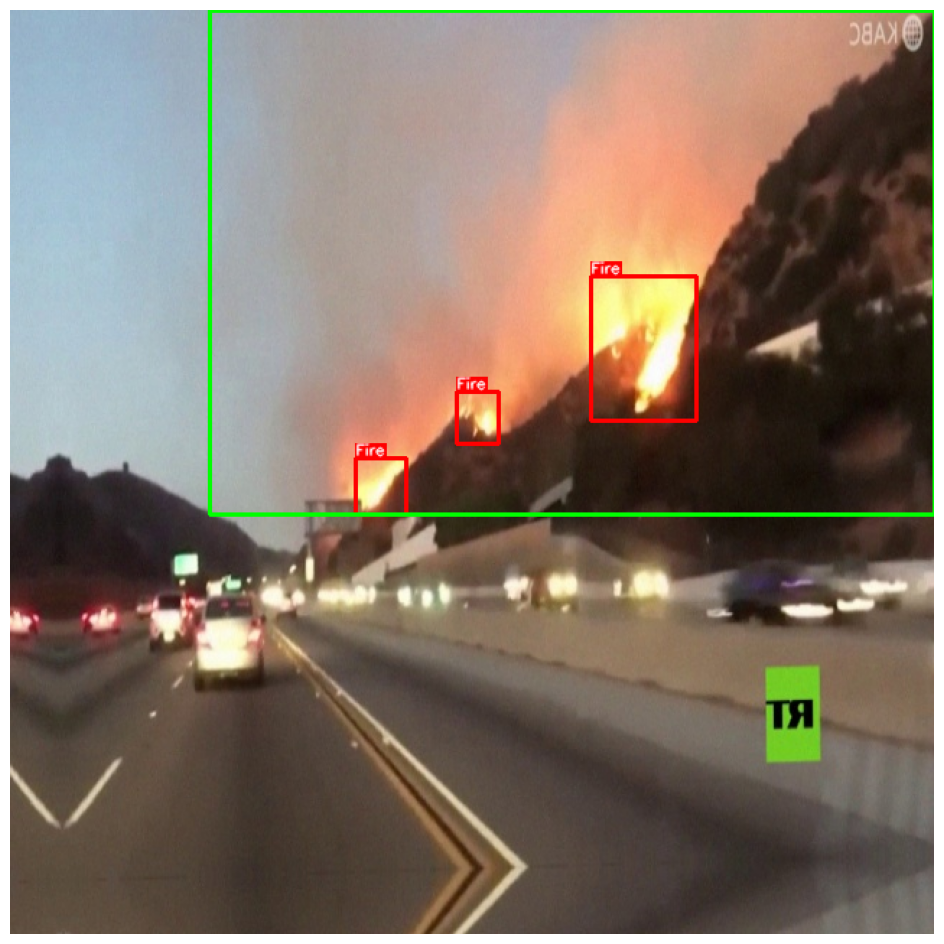

In [ ]:
# @title Show some image
# random grab some image
labels = []
while True:
  image_path = glob.glob(f'{train_dataset}images/*')[random.randint(0,17000)]
  label_txt = os.path.basename(image_path).split('.')[0]
  label_txt = f"{train_dataset}labels/{label_txt}.txt"
  try:
    with open(label_txt, 'r') as file:
      for line in file:
          label_id = file.readline()[0]
          if label_id:
            labels.append(label_id)
          else:
            continue
  except:
    continue

  if len(labels) >=3:
    break

print(image_path)
print(label_txt)
print(labels)

# image size
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h, w, _ = image.shape
print(h, w)

# read bounding box
bboxes, labels = read_yolo_annotations(label_txt)

# de-normalize
bbox = []
for box in bboxes:
  x1, y1, x2, y2 = de_norm_bounding_box(box, w, h)
  bbox.append([x1, y1, x2, y2])
print(bbox)

# show image
img = visualize(image, bbox, labels, labels_id_to_name)

# Final Fire-Dataset

In [ ]:
# Download
!zip -r /content/Datasets_aug.zip /content/Datasets

In [ ]:
from google.colab import files
files.download("/content/Datasets_aug.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training

In [ ]:
# @title Check cuda
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
torch.cuda.is_available()

In [ ]:
# @title Experiment 1: Default Hyperparameter
%cd /content/yolov5/

!python train.py \
--img 640 --epochs 300 --save-period 100 --batch 128 \
--data /content/D-File-Datasets/data.yaml \
--weights yolov5n.pt --cache ram